In [158]:
import pandas as pd
import numpy as np
import seaborn as snb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#Classification problems algorithm

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve
from sklearn.model_selection import cross_val_score

In [159]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')

df.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [160]:
df.shape

(614, 13)

We have dataset of 614 rows and 13 columns

In [161]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Gender, Married,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History has null fields.
I need to fill null values

In [162]:
#Checking columns datatypes

df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

I need to convert columns of object types to numerical for me to analyse and models to process


Based on definition of these columns, I will be able to identify columns that is not contributin to approval of loans 

Loan_ID, Gender can easily be identified has columns not adding value, I will be droping them and use some analytical tools after converting objects to numerical values

In [163]:
df.drop(columns=['Loan_ID', 'Gender'], inplace=True)

df

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [164]:
# convert object values to numerical for analysis

# converting string values into numbers for model to use
from sklearn.preprocessing import LabelEncoder

for col in df.columns:
    if df.dtypes[col] == 'object':
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])
print(df)

     Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0          0           0          0              0             5849   
1          1           1          0              0             4583   
2          1           0          0              1             3000   
3          1           0          1              0             2583   
4          0           0          0              0             6000   
..       ...         ...        ...            ...              ...   
609        0           0          0              0             2900   
610        1           3          0              0             4106   
611        1           1          0              0             8072   
612        1           2          0              0             7583   
613        0           0          0              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                  0.0         NaN             360.0             1.0   
1  

In [165]:
df.isna().sum()

Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [166]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

In [167]:
df['Credit_History'].isna().value_counts()

False    564
True      50
Name: Credit_History, dtype: int64

I will be droping columns with Nan values to avoid building a biased model

In [168]:
df.dropna(inplace=True)

df

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [169]:
x = df.drop('Loan_Status', axis=1)

y = df['Loan_Status']

In [170]:
# Select best performing features
from sklearn.feature_selection import SelectKBest, f_classif


# Checking best performing features
best_features = SelectKBest(score_func=f_classif,k='all')
fit = best_features.fit(x,y)
df_score = pd.DataFrame(fit.scores_)
df_col = pd.DataFrame(x.columns)

features_score = pd.concat([df_col,df_score], axis=1)

features_score.columns = ['feature_name', 'score']

print(features_score.nlargest(11,'score'))

        feature_name       score
8     Credit_History  225.523584
0            Married    5.173752
2          Education    3.262122
5  CoapplicantIncome    0.992369
3      Self_Employed    0.811451
9      Property_Area    0.733724
6         LoanAmount    0.708506
7   Loan_Amount_Term    0.431461
1         Dependents    0.036410
4    ApplicantIncome    0.020793


To validate the report I will plot a graph

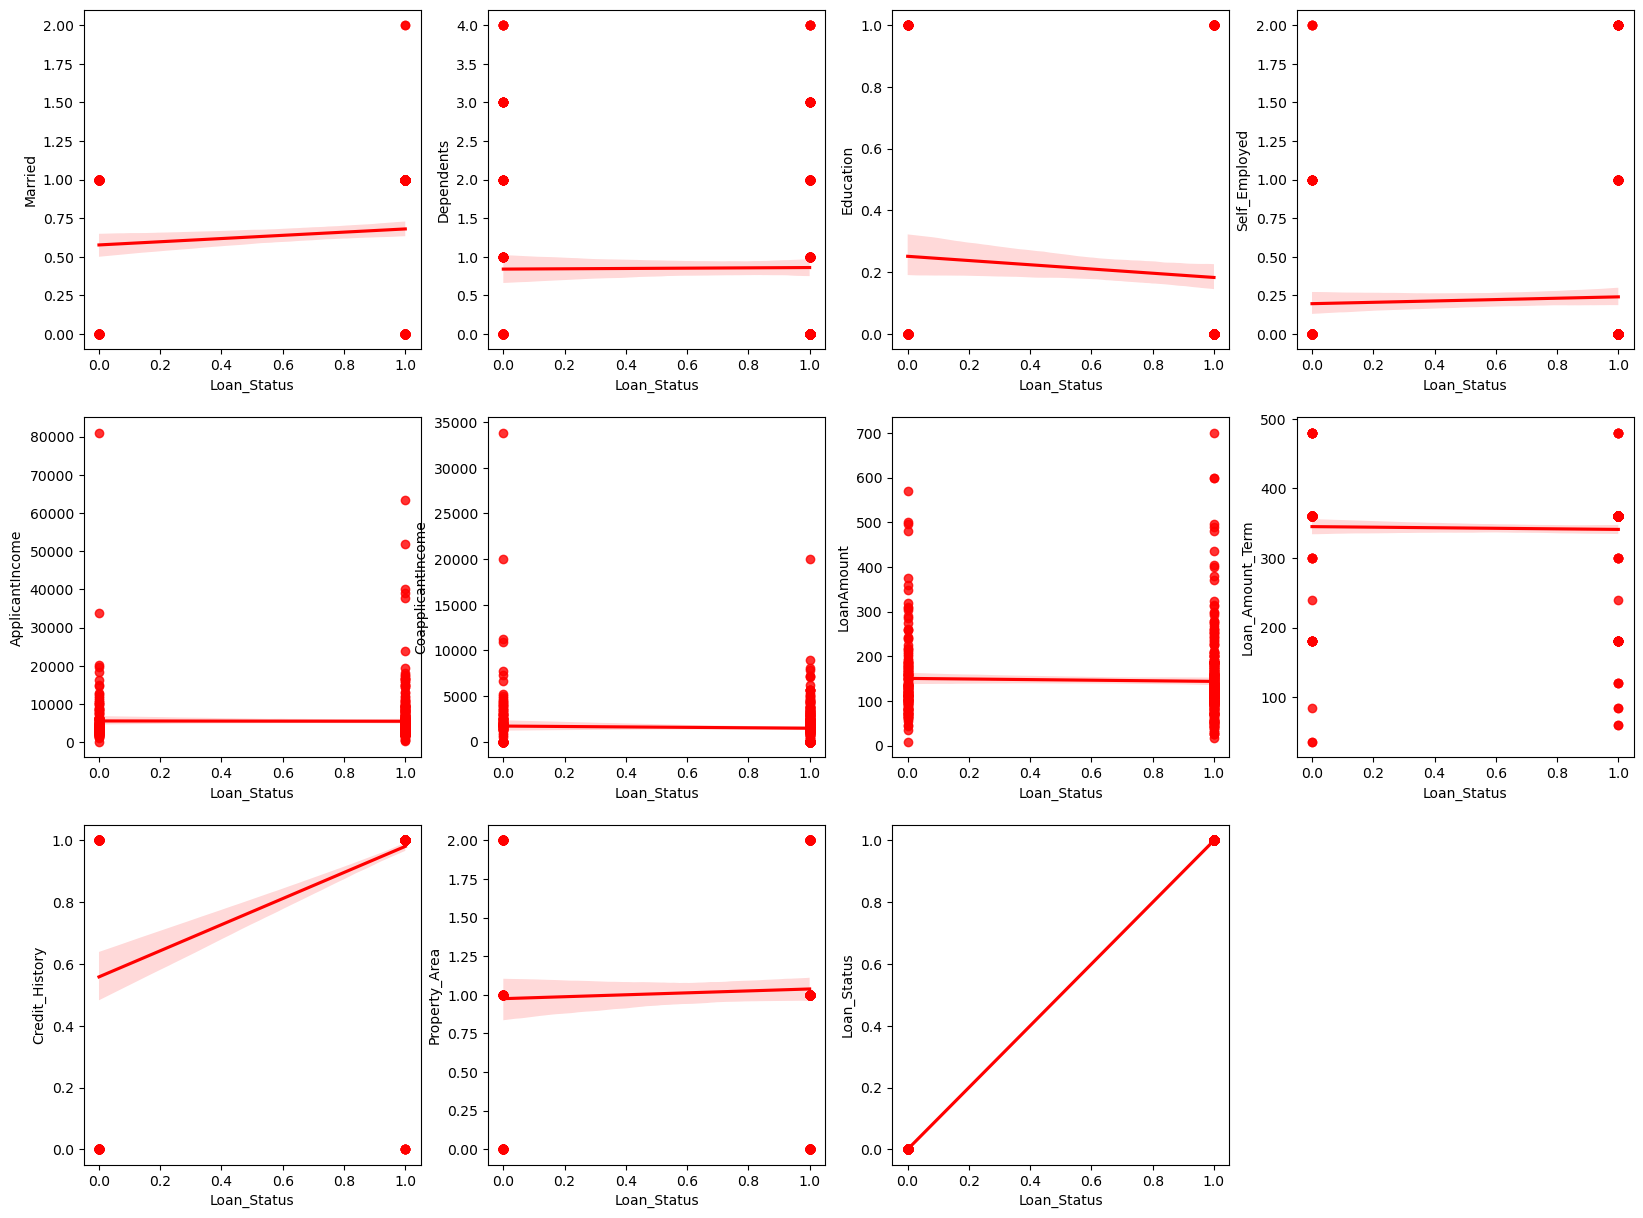

In [171]:
# Plot to check correlationship between features and label

plt.figure(figsize=(20,15))

p = 1

for i in df:
    if p <= 18:
        plt.subplot(3,4,p)
        snb.regplot(x='Loan_Status', y=i, data=df, color='r')
        plt.xlabel='Loan_Status'
        plt.ylabel=i
        
    p += 1

plt.show()

From the plot I can comfirm the report of selectKBest, I will be droping columns starting from CoapplicantIncome down because the relationship with lable is insignificant and not contributing to outcome

In [172]:
df.drop(columns=['CoapplicantIncome','Self_Employed','Property_Area','LoanAmount','Loan_Amount_Term','Dependents','ApplicantIncome'], inplace=True)

df

,Married,Education,Credit_History,Loan_Status
1,1,0,1.0,0
2,1,0,1.0,1
3,1,1,1.0,1
4,0,0,1.0,1
5,1,0,1.0,1
...,...,...,...,...
609,0,0,1.0,1
610,1,0,1.0,1
611,1,0,1.0,1
612,1,0,1.0,1


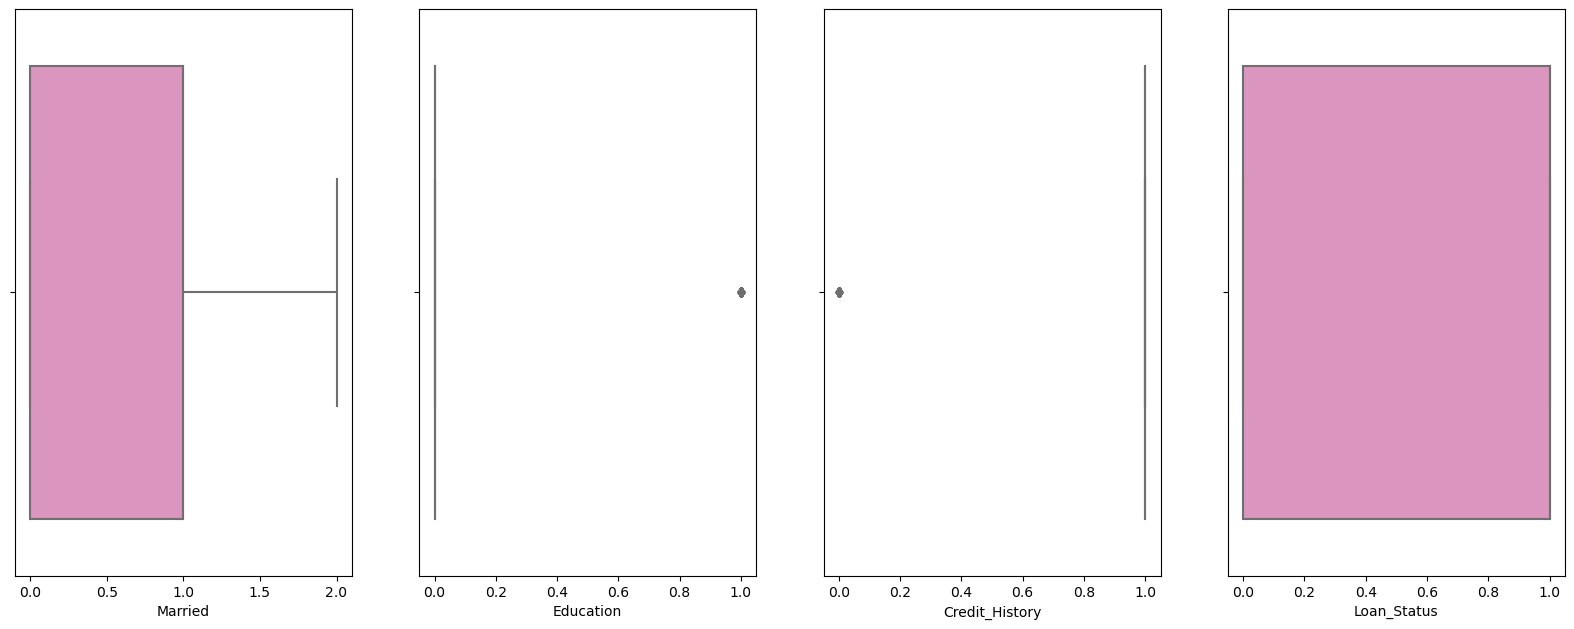

In [173]:
# Lets check for outliers using Boxplot

plt.figure(figsize=(20,25))

p=1

for i in df:
    if p<=13:
        plt.subplot(3,4,p)
        snb.boxplot(df[i], palette='Set2_r')
        plt.xlabel=i
        
    p+=1
    
plt.show()

No outlier

Let me check for multicolinearity



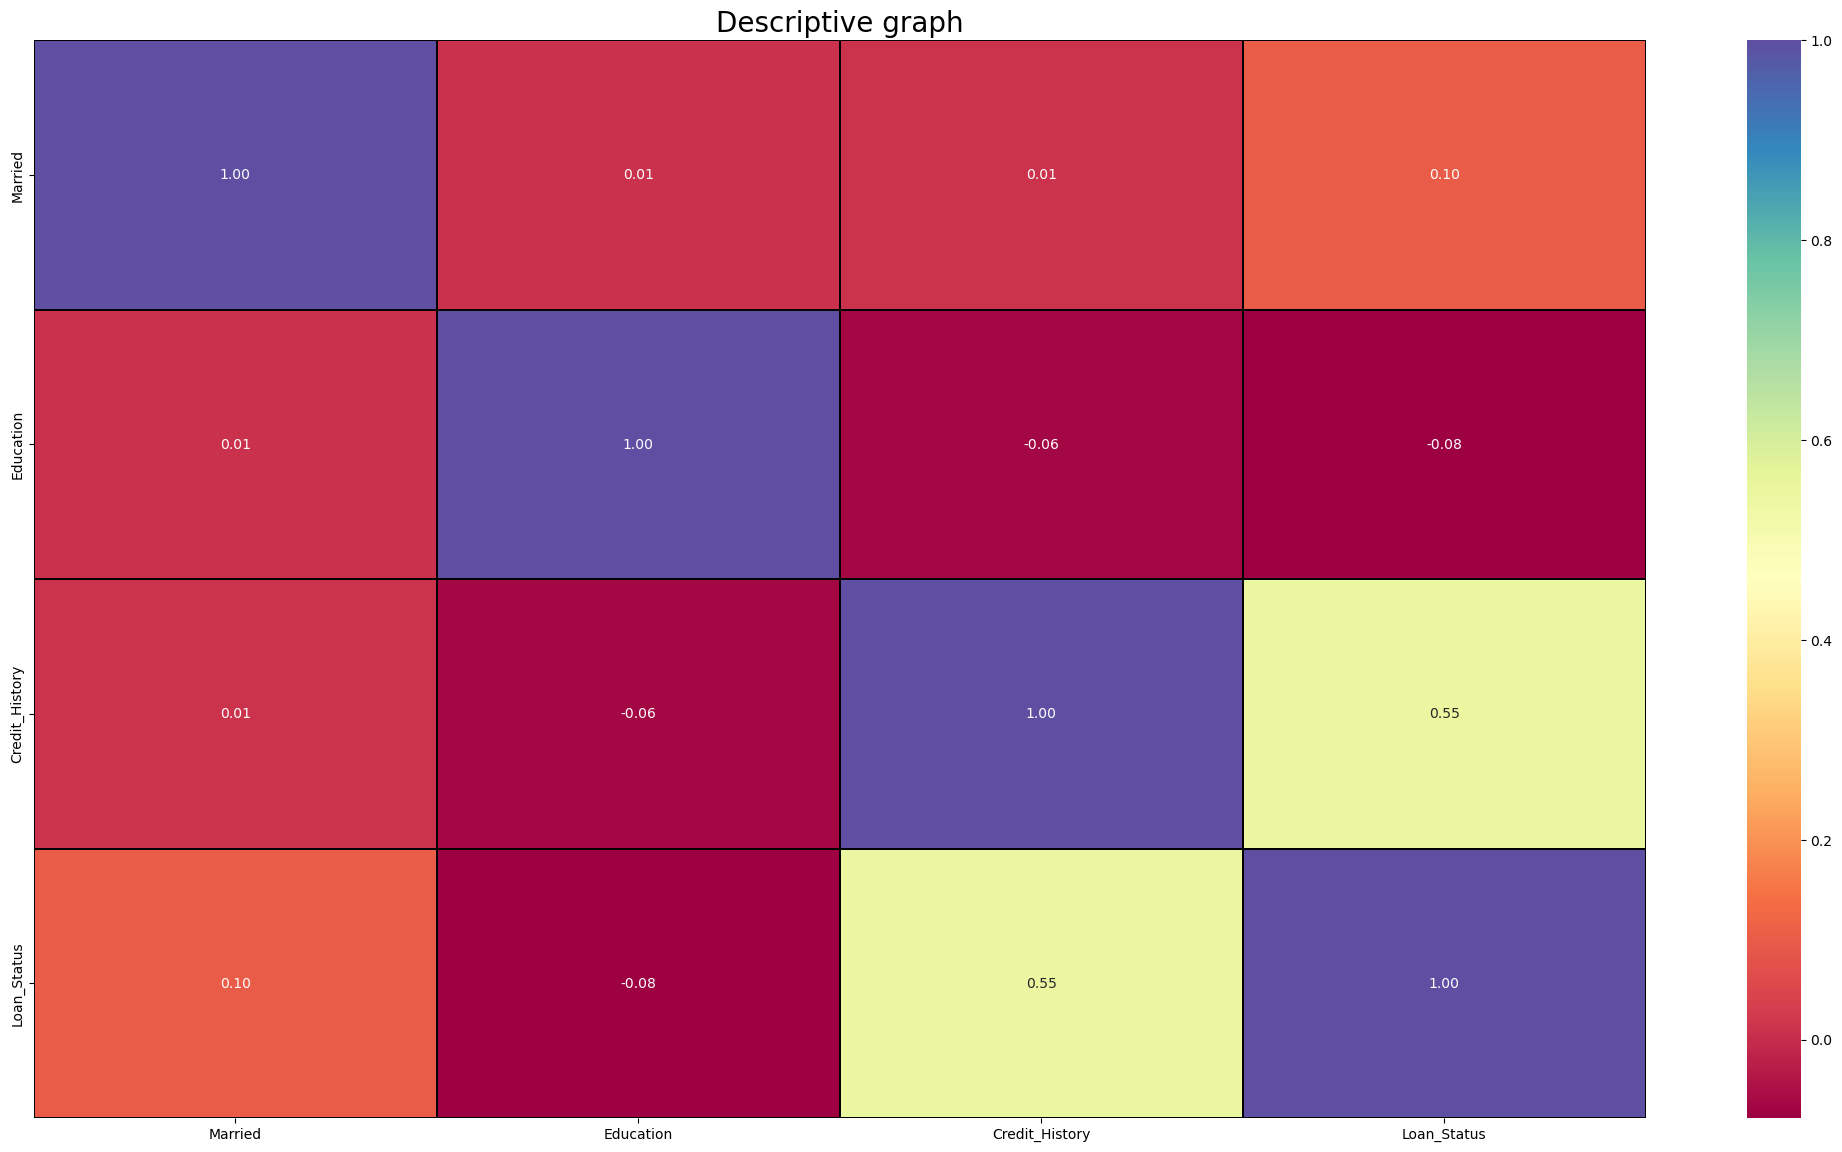

In [174]:
# Checking for multi-colinearity using heatmap
plt.figure(figsize=(26,14))
snb.heatmap(df.corr(), annot=True, fmt='0.2f', linewidths=0.2, linecolor='black', cmap='Spectral')
plt.xlabel='figure'
plt.ylabel='feature name'
plt.title('Descriptive graph', fontsize=20)
plt.show()

No multicolinearity

<function matplotlib.pyplot.show(close=None, block=None)>

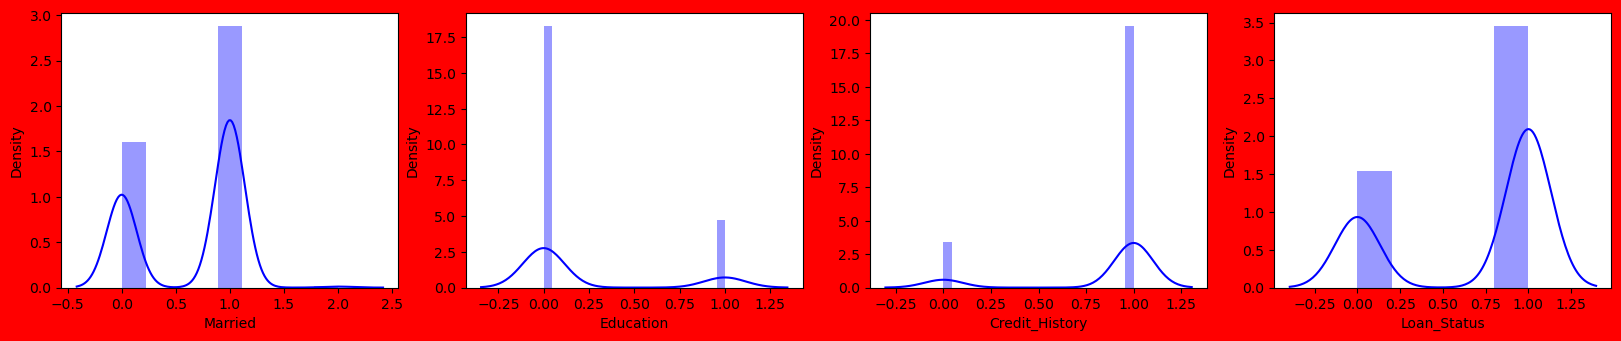

In [175]:
#check for skewness

# Checking how data is distributed across columns

plt.figure(figsize=(20,25), facecolor='red')
p=1

for i in df:
    if p<= 14:
        ax = plt.subplot(6,4,p)
        snb.distplot(df[i], color='b')
        plt.xlabel=i
    p += 1
plt.show


In [176]:
# to further confirm skewness, i will be using skew method
df.skew()

Married          -0.523602
Education         1.472060
Credit_History   -1.973278
Loan_Status      -0.833481
dtype: float64

In [177]:
from sklearn.preprocessing import PowerTransformer

# Apply Yeo-Johnson transformation to the skewed column
pt = PowerTransformer(method='yeo-johnson')

#for col in df:
#    if (df[col].skew() < -0.5) or (df[col].skew() > 0.5):
#        df[col] = pt.fit_transform(df[col].values.reshape(-1, 1))
#df.skew()

df['Married'] = pt.fit_transform(df['Married'].values.reshape(-1, 1))
df['Education'] = pt.fit_transform(df['Education'].values.reshape(-1, 1))

df.skew()

Married          -0.341071
Education         1.472060
Credit_History   -1.973278
Loan_Status      -0.833481
dtype: float64

Don't bother skewness of label, Education and credit history is looking good

In [178]:
#Seperate the label from feature

x = df.drop('Loan_Status', axis =1)
y = df['Loan_Status']

In [179]:
# feature scaling using standard scalarization to avoid biasness

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x= pd.DataFrame(scaler.fit_transform(x) , columns=x.columns)

x

,Married,Education,Credit_History
0,0.707437,-0.506490,0.418994
1,0.707437,-0.506490,0.418994
2,0.707437,1.974373,0.418994
3,-1.318529,-0.506490,0.418994
4,0.707437,-0.506490,0.418994
...,...,...,...
524,-1.318529,-0.506490,0.418994
525,0.707437,-0.506490,0.418994
526,0.707437,-0.506490,0.418994
527,0.707437,-0.506490,0.418994


In [180]:
# Check for variance inflation factor to further check for multicolinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif['Features'] = x.columns

vif

,VIF Values,Features
0,1.000291,Married
1,1.004186,Education
2,1.004372,Credit_History


Within acceptable threshold of 5 

let me check for data inbalance in loan_status column

In [181]:
df['Loan_Status'].value_counts()

1    366
0    163
Name: Loan_Status, dtype: int64

In [182]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()

x,y = SM.fit_resample(x,y)

In [183]:
y.value_counts()

0    366
1    366
Name: Loan_Status, dtype: int64

In [215]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxAccu = 0
maxRS = 0

for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y ,test_size =0.30, random_state=i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train, y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
print('Best accuracy is : ', maxAccu, ' at random state : ',maxRS)

Best accuracy is :  0.7545454545454545  at random state :  55


In [216]:
#creating train test split

x_train, x_test, y_train, y_test = train_test_split(x,y ,test_size =0.30, random_state=maxRS)

In [217]:
# Classification Algorithm

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve 
from sklearn.model_selection import cross_val_score

#RandomForestClassifier
#checking accuracy for random forest classifier 

RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)

predRFC = RFC.predict(x_test)
print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, predRFC))

0.7545454545454545
[[ 57  51]
 [  3 109]]
              precision    recall  f1-score   support

           0       0.95      0.53      0.68       108
           1       0.68      0.97      0.80       112

    accuracy                           0.75       220
   macro avg       0.82      0.75      0.74       220
weighted avg       0.81      0.75      0.74       220



In [218]:
#LogisticsRegression
#checking accuracy for LogisticsRegression  

LR = LogisticRegression()
LR.fit(x_train, y_train)

predLR = LR.predict(x_test)
print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test, predLR))

0.7545454545454545
[[ 57  51]
 [  3 109]]
              precision    recall  f1-score   support

           0       0.95      0.53      0.68       108
           1       0.68      0.97      0.80       112

    accuracy                           0.75       220
   macro avg       0.82      0.75      0.74       220
weighted avg       0.81      0.75      0.74       220



In [219]:
#AdaBoostClassifier
#checking accuracy for AdaboostClassifier 

AD = AdaBoostClassifier()
AD.fit(x_train, y_train)

predAD = AD.predict(x_test)
print(accuracy_score(y_test, predAD))
print(confusion_matrix(y_test, predAD))
print(classification_report(y_test, predAD))

0.7545454545454545
[[ 57  51]
 [  3 109]]
              precision    recall  f1-score   support

           0       0.95      0.53      0.68       108
           1       0.68      0.97      0.80       112

    accuracy                           0.75       220
   macro avg       0.82      0.75      0.74       220
weighted avg       0.81      0.75      0.74       220



In [220]:
#ExtraTreeClassifier
#checking accuracy for ExtraTreeClassifier 

ET = ExtraTreesClassifier()
ET.fit(x_train, y_train)

predET = ET.predict(x_test)
print(accuracy_score(y_test, predET))
print(confusion_matrix(y_test, predET))
print(classification_report(y_test, predET))

0.7545454545454545
[[ 57  51]
 [  3 109]]
              precision    recall  f1-score   support

           0       0.95      0.53      0.68       108
           1       0.68      0.97      0.80       112

    accuracy                           0.75       220
   macro avg       0.82      0.75      0.74       220
weighted avg       0.81      0.75      0.74       220



In [221]:
# Validation accuracy score to be sure its not as a result of over fitting 

# Using Cross validation

from sklearn.model_selection import cross_val_score

score = cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print('Difference between accuracy score and RandomForestClassifier is ', accuracy_score(y_test, predRFC) - score.mean())

[0.68027211 0.72789116 0.65068493 0.71232877 0.69178082]
0.6925915571708134
Difference between accuracy score and RandomForestClassifier is  0.061953897374641076


In [222]:

score = cross_val_score(LR,x,y)
print(score)
print(score.mean())
print('Difference between accuracy score and LogisticsRegression is ', accuracy_score(y_test, predLR) - score.mean())

[0.68027211 0.74829932 0.65068493 0.71232877 0.67808219]
0.6939334637964775
Difference between accuracy score and LogisticsRegression is  0.06061199074897705


In [223]:
score = cross_val_score(AD,x,y)
print(score)
print(score.mean())
print('Difference between accuracy score and AdaboostClassifier is ', accuracy_score(y_test, predAD) - score.mean())

[0.68027211 0.74829932 0.65753425 0.71232877 0.67808219]
0.6953033268101763
Difference between accuracy score and AdaboostClassifier is  0.05924212773527826


In [224]:
score = cross_val_score(ET,x,y)
print(score)
print(score.mean())
print('Difference between accuracy score and LogisticsRegression is ', accuracy_score(y_test, predET) - score.mean())

[0.68027211 0.72789116 0.65068493 0.71232877 0.69178082]
0.6925915571708134
Difference between accuracy score and LogisticsRegression is  0.061953897374641076


In [225]:
AdaBoostClassifier().get_params().keys()

dict_keys(['algorithm', 'base_estimator', 'learning_rate', 'n_estimators', 'random_state'])

In [226]:

#Hyper parameter Tunning 
#Type of cross validation method to get best values for model parameters IN THIS CASE ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'base_estimator': [None, DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2)],
    'algorithm': ['SAMME', 'SAMME.R']
}

GCV = GridSearchCV(AdaBoostClassifier(), parameters, cv = 5)

GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'base_estimator': [None,
                                            DecisionTreeClassifier(max_depth=1),
                                            DecisionTreeClassifier(max_depth=2)],
                         'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [50, 100, 200]})

In [227]:
GCV.best_params_

{'algorithm': 'SAMME',
 'base_estimator': None,
 'learning_rate': 0.01,
 'n_estimators': 50}

In [245]:
final_model = AdaBoostClassifier(algorithm = 'SAMME', base_estimator=None, learning_rate = 0.01, n_estimators = 50)

In [246]:
final_model.fit(x_train, y_train)
pred = final_model.predict(x_test)

accuracy = accuracy_score(y_test, pred)

print(acc * 100)


67.27272727272727


In [247]:
# Saving the model
# Using .pkl

import joblib
joblib.dump(final_model,'loanPrediction.pkl')

['loanPrediction.pkl']

In [248]:
# Lets load save model and get prediction

model = joblib.load('loanPrediction.pkl')

In [252]:
# Testing the loaded model
prediction = model.predict(x_test)
prediction

array([1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0])

In [253]:
a = np.array(y_test)
df = pd.DataFrame()

df['predicted'] = prediction
df['original'] = a

df

,predicted,original
0,1,0
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
215,0,0
216,1,1
217,1,1
218,0,0
